<a href="https://colab.research.google.com/github/ElizaLo/ML-using-Jupiter-Notebook-and-Google-Colab/blob/master/Quora%20Insincere%20Questions%20Classification/Quora_Insincere_Questions_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quora Insincere Questions Classification

### **Detect toxic content to improve online conversations**

In [0]:
from google.colab import files
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk
import os
import sys
import re

tf.logging.set_verbosity(tf.logging.ERROR) # Устанавливает порог для того, какие сообщения будут регистрироваться.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
os.chdir("/content/gdrive/My Drive/Quora Insincere Questions Classification")

In [0]:
train = pd.read_csv("train.csv", encoding = 'latin-1')
test = pd.read_csv("test.csv", encoding = 'latin-1')

In [5]:
train.head(15)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
5,00004f9a462a357c33be,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0
6,00005059a06ee19e11ad,Why does Quora automatically ban conservative ...,0
7,0000559f875832745e2e,Is it crazy if I wash or wipe my groceries off...,0
8,00005bd3426b2d0c8305,"Is there such a thing as dressing moderately, ...",0
9,00006e6928c5df60eacb,Is it just me or have you ever been in this ph...,0


In [6]:
train.columns = ['qid', 'question_text', 'target']
train.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [7]:
train_labels = train['target']
train_labels.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [8]:
test.head(15)

,qid,question_text
0,00014894849d00ba98a9,My voice range is A2-C5. My chest voice goes u...
1,000156468431f09b3cae,How much does a tutor earn in Bangalore?
2,000227734433360e1aae,What are the best made pocket knives under $20...
3,0005e06fbe3045bd2a92,Why would they add a hypothetical scenario tha...
4,00068a0f7f41f50fc399,What is the dresscode for Techmahindra freshers?
5,000a2d30e3ffd70c070d,How well are you adapting to the Trump era?
6,000b67672ec9622ff761,What should be the last thing people do in life?
7,000b7fb1146d712c1105,Received conditional offer for Masters in Inte...
8,000d665a8ddc426a1907,What does appareils photo mean in French?
9,000df6fd2229447b2969,Is there a system of Public Interest Litigatio...


In [9]:
print("Train shape: ",train.shape)
print("Test shape: ",test.shape)

Train shape:  (1306122, 3)
Test shape:  (56370, 2)


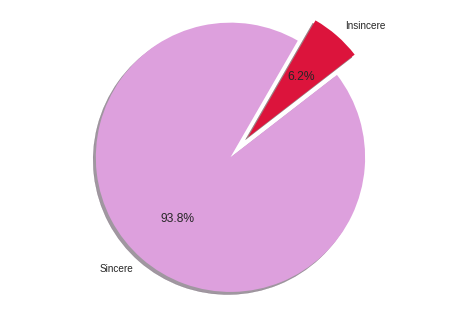

In [0]:
count_Class = pd.value_counts(train.target, sort = True)

# Data to Plot
target = 'Sincere', 'Insincere'
sizes = [count_Class[0], count_Class[1]]
colors = ['plum', 'crimson']
explode = (0.1, 0.1)

# Plot
plt.pie(sizes, explode = explode, labels = target, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 60)
plt.axis('equal')
plt.show()

In [0]:
train_data = train.question_text

vectorizer = CountVectorizer()
# X matrix where the row represents sentences and column is our one-hot vector for each token in our vocabulary
X = vectorizer.fit_transform(train_data)
# Vocabulary
vocabulary = np.array(vectorizer.get_feature_names())
counts = np.array(X.sum(axis=0).A1)
countsGE5 = counts[counts >= 5] # GE - Greater or Equal
vocabularyGE5 = vocabulary[counts >= 5]
distr = dict(zip(vocabularyGE5, countsGE5))

In [0]:
# vectorizer.vocabulary_

In [0]:
countsGE5

array([ 286, 2106,    5, ...,    5,    6,    8], dtype=int64)

In [0]:
#distr

In [0]:
sorted_by_value = sorted(distr.items(), key=lambda kv: kv[1])

In [0]:
#sorted_by_value

In [0]:
vectorizer = CountVectorizer()


train_counts = vectorizer.fit(train.question_text)

# preparing for training set
train_df = vectorizer.transform(train.question_text)

# preparing for test set
test_df = vectorizer.transform(test.question_text)

# **Decision Tree learning**

In [0]:
DT = DecisionTreeClassifier()
DT.fit(train_df, train.target)
predicted_values_DT = DT.predict(test_df)
print(predicted_values_DT)

In [0]:
accuracy_DT = accuracy_score(test.target, predicted_values_DT)
predictions['DT'] = accuracy_DT * 100
print("\nThe accuracy of Decision Tree learning is {}%".format(accuracy_DT * 100))

In [0]:
confusion_matrix_DT = confusion_matrix(test_df.question_text, predicted_values_DT)
print("\n", confusion_matrix_DT)

In [0]:
skplt.metrics.plot_confusion_matrix(test_df.Label, predicted_values_DT, normalize = True)
plt.show()

# Splitting the Train data into Test and Train Data


In [0]:
train_set, test_set, train_label, test_label = train_test_split(train, train_labels, test_size=0.33, random_state=42)

## **Taking first 10'000 from train data and first 100 from test data**

In [0]:
train_size = 10000
test_size = 1000

In [0]:
conc = pd.DataFrame ( np.concatenate((train_set[0:train_size], test_set[0:test_size]))[:,1], columns = ["question_text"] )

In [0]:
vectorizer = CountVectorizer()
train_test_df = vectorizer.fit_transform(conc.question_text)

In [0]:
train_df = train_test_df[0:train_size]
test_df = train_test_df[train_size:-1]

# **Decision Tree learning**

In [0]:
DT = DecisionTreeClassifier()
DT.fit(train_df, train.target[0:train_size])
predicted_values_DT = DT.predict(test_df)
print(predicted_values_DT)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 

In [0]:
test_set.target.shape

(431021,)

In [0]:
accuracy_DT = accuracy_score(test_set.target, predicted_values_DT)
predictions['DT'] = accuracy_DT * 100
print("\nThe accuracy of Decision Tree learning is {}%".format(accuracy_DT * 100))

ValueError: ignored

In [0]:
confusion_matrix_DT = confusion_matrix(test_set.target[0:test_size], predicted_values_DT)
print("\n", confusion_matrix_DT)